# Code Explanation

## Importing Necessary Libraries
1. **`from PIL import Image`:**  
   - Imports the `Image` module from the Python Imaging Library (Pillow) to work with images (e.g., opening, manipulating, or saving images).  
2. **`import matplotlib.pyplot as plt`:**  
   - Imports the `pyplot` module from Matplotlib for displaying the image graphically.  
3. **`import os`:**  
   - Allows interaction with the file system, such as traversing directories and accessing file paths.  

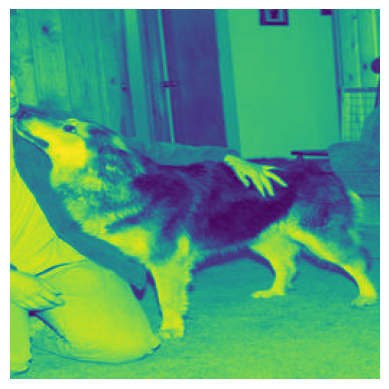

In [59]:
from PIL import Image
import matplotlib.pyplot as plt
import os
# Load and display the first image as an example
import os

def get_all_files(folder_path):
    all_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            all_files.append(os.path.join(root, file))
    return all_files

# Example usage
folder_path = "Animals"
files = get_all_files(folder_path)

image = Image.open(files[1000])

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axes
plt.show()


# Code Explanation

## Importing Required Libraries
- The code uses the `os` library to handle file system operations and the `Image` module from the Pillow library to process image files.

---

## Input and Output Directory
```python
input_directory = 'Animals'
output_directory = 'grey_Animals'


input_directory: Directory containing the original images.
output_directory: Directory where grayscale versions of the images will be saved.

In [60]:
input_directory = 'Animals'
output_directory = 'grey_Animals'

if not os.path.exists(output_directory):
    os.makedirs(output_directory+'\\cats')
    os.makedirs(output_directory+'\\dogs')
    os.makedirs(output_directory+'\\snakes')

for root, dirs, files in os.walk(input_directory):
    for file in files:
        image_path = os.path.join(root, file)
        image = Image.open(image_path)
        grayscale_image = image.convert('L')
        # print(os.path.join(root, file))
        new_root = root.replace(input_directory, output_directory)
        grayscale_image.save(os.path.join(new_root, file))

# Code Explanation

## Purpose
- This code visualizes the grayscale image located at index `1000` in the list of files from the `grey_Animals` folder using Matplotlib.


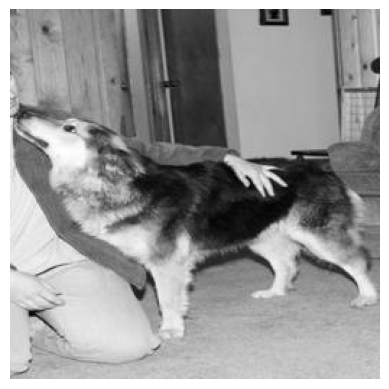

In [61]:
folder_path = "grey_Animals"
files = get_all_files(folder_path)

image = Image.open(files[1000])

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axes
plt.show()



This code demonstrates the use of Principal Component Analysis (PCA) for dimensionality reduction on grayscale images. It begins by importing necessary libraries, including `os` for file operations, `numpy` for numerical processing, `Pillow (PIL)` for image manipulation, `scikit-learn` for implementing PCA, and `matplotlib` for visualization. The goal is to process all images in a directory, reduce their dimensionality while retaining 90% of the variance, and visualize the relationship between the number of principal components and explained variance.

The first step involves loading and preprocessing the images. All images are resized to 100x100 pixels to standardize their dimensions and reduce computational cost. The `os.walk()` function recursively retrieves all image paths from the directory, and the paths are randomized using Python’s `random.sample()` to ensure no bias in the order of processing. Each image is opened, converted to grayscale using `convert('L')`, resized to the target dimensions, and flattened into a one-dimensional array. These flattened arrays are stored in a list, which is later converted to a NumPy matrix for PCA. Additionally, the labels for each image are extracted from the directory structure to associate the images with their respective classes.

Next, PCA is applied to the processed data. A PCA object is initialized with a parameter of `0.90`, which instructs it to retain 90% of the variance in the data. The PCA model is fitted to the image matrix, and the number of components required to achieve this variance threshold is determined using the `n_components_` attribute. This result highlights how PCA can significantly reduce the dimensionality of the data while preserving most of the information.

Finally, the code visualizes the cumulative explained variance as a function of the number of principal components. The cumulative sum of the explained variance ratio is computed and plotted, showing how the variance increases as more components are included. This visualization helps in understanding the trade-off between dimensionality and information retention. Overall, this script demonstrates an efficient workflow for dimensionality reduction using PCA, which can be particularly useful in image processing tasks where computational resources are limited.

The number of components required to retain 90% of the variance: 263


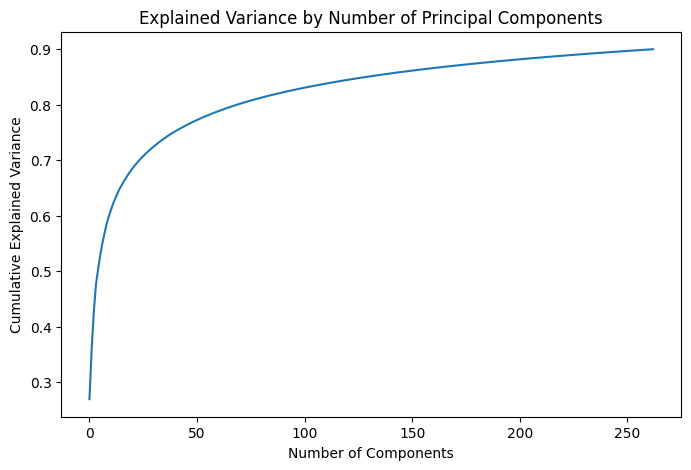

In [67]:
#1
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Images
image_size = (100, 100)  # Resize images to 100x100 pixels for faster computation
images = []
labels=[]

# Loop through each image in the folder and preprocess
# for image_file in os.listdir(output_directory):
#     image_path = os.path.join(output_directory, image_file)
#     label = image_file[0]
image_paths = []
for root, dirs, files in os.walk(output_directory):
    for file in files:
        image_path = os.path.join(root, file)
        image_paths.append(image_path)

import random
image_paths = random.sample(image_paths, len(image_paths))

for i in image_paths:
    image = Image.open(i).convert('L')
    image = image.resize(image_size)
    # Flatten the image to a 1D array and add it to the list
    images.append(np.array(image).flatten())
    labels.append(i.split('\\')[-2])

# Convert the list of images to a NumPy array
images_matrix = np.array(images)

# Step 2: Apply     PCA to Preserve 90% of the Variance
pca_90 = PCA(0.90)  # 90% of the variance
pca_90.fit(images_matrix)

# Number of components needed to preserve 90% of the variance
num_components_90 = pca_90.n_components_
print(f"The number of components required to retain 90% of the variance: {num_components_90}")

# Step 3: Visualize the Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_90.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()

This section of the code visualizes the effect of PCA by displaying a comparison between original and reconstructed images. Here's the explanation in paragraph form:

The script first selects a subset of the processed images (`images_matrix`) for visualization. In this case, the first 10 images are chosen and stored in the `selected_images` variable. These selected images are used to demonstrate how PCA reconstructs images after dimensionality reduction. Reconstruction involves transforming the selected images into the reduced PCA space using `pca_90.transform()` and then mapping them back to the original space with `pca_90.inverse_transform()`. This process produces the `reconstructed_images`, which are approximations of the original images.

To visualize the comparison, the script creates a figure with 2 rows and 10 columns using `matplotlib`. The first row displays the original images by reshaping their flattened arrays into their original dimensions (`100x100`) and plotting them with a grayscale colormap (`cmap='gray'`). The second row displays the corresponding reconstructed images in the same manner. Each image in both rows is labeled with a title ("Original" for the top row and "Reconstructed" for the bottom row) for clarity, and the axes are turned off for a cleaner presentation. This visualization highlights how well PCA preserves the visual information of images while reducing their dimensionality, showcasing the trade-off between compression and reconstruction accuracy.

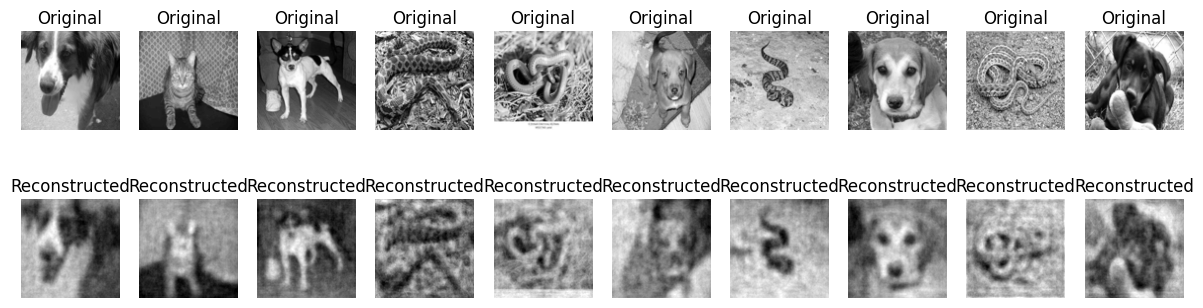

In [68]:
#2
num_images_to_display = 10
selected_images = images_matrix[:num_images_to_display]

# Step 2: Reconstruct images using PCA
reconstructed_images = pca_90.inverse_transform(pca_90.transform(selected_images))
num_images_to_display = 10
fig, axes = plt.subplots(2, num_images_to_display, figsize=(15, 4))

for i in range(num_images_to_display):
    axes[0, i].imshow(selected_images[i].reshape(image_size), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title("Original")

    axes[1, i].imshow(reconstructed_images[i].reshape(image_size), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title("Reconstructed")

This code demonstrates how PCA can reduce a high-dimensional dataset to two dimensions while calculating the explained variance contributed by these two components. Here’s the explanation in paragraph form:

The script initializes a PCA object with `n_components=2`, specifying that the data will be reduced to two principal components. This is a common approach for visualizing high-dimensional data in a 2D space. The `fit_transform()` method is applied to the image matrix (`images_matrix`), transforming the original high-dimensional image data into the reduced 2D space. The resulting `pca_data` contains the projection of the original data along the first two principal components.

To assess how much information these two components retain, the script calculates the cumulative explained variance ratio using `pca.explained_variance_ratio_`. This value represents the proportion of the total variance in the dataset explained by the first two principal components. The script then sums these values and prints the result as a percentage, formatted to two decimal places. This output provides insight into the efficiency of dimensionality reduction and helps determine whether two components are sufficient for capturing most of the variance in the data which is 35.78%

In [69]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(images_matrix)
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by the first two components: {explained_variance:.2%}")

Variance explained by the first two components: 35.78%


In [70]:
set(labels)

{'cats', 'dogs', 'snakes'}

This code creates a 2D scatter plot to visualize the data in the reduced PCA space, highlighting different categories with distinct colors. Here’s the explanation:

The script begins by defining a dictionary called `categories` that maps class labels (`cats`, `dogs`, `snakes`) to specific colors (`red`, `blue`, `green`). The `labels` list, which contains the class labels for each data point, is used to assign a color to each point in the PCA-transformed dataset (`pca_data`) based on its category. A list comprehension generates a corresponding list of colors (`colors`) for all points.

Next, a scatter plot is created using `matplotlib`. The x-axis and y-axis represent the first and second principal components (`PC1` and `PC2`), respectively, from the PCA transformation. Each data point is plotted with its assigned color (`c=colors`), a slight transparency (`alpha=0.7`) for better visualization, and a black edge outline (`edgecolors='k'`).

The plot is titled "PCA Visualization (2D Scatter)" and labeled with "PC1" and "PC2" for the axes to indicate the principal components. To enhance interpretability, a legend is added using `matplotlib.patches.Patch` objects. These patches represent the mapping of colors to categories, and the legend is positioned automatically at the best location (`loc="best"`). This visualization provides a clear 2D representation of how the data clusters and separates across the two principal components, revealing potential patterns or groupings in the dataset.

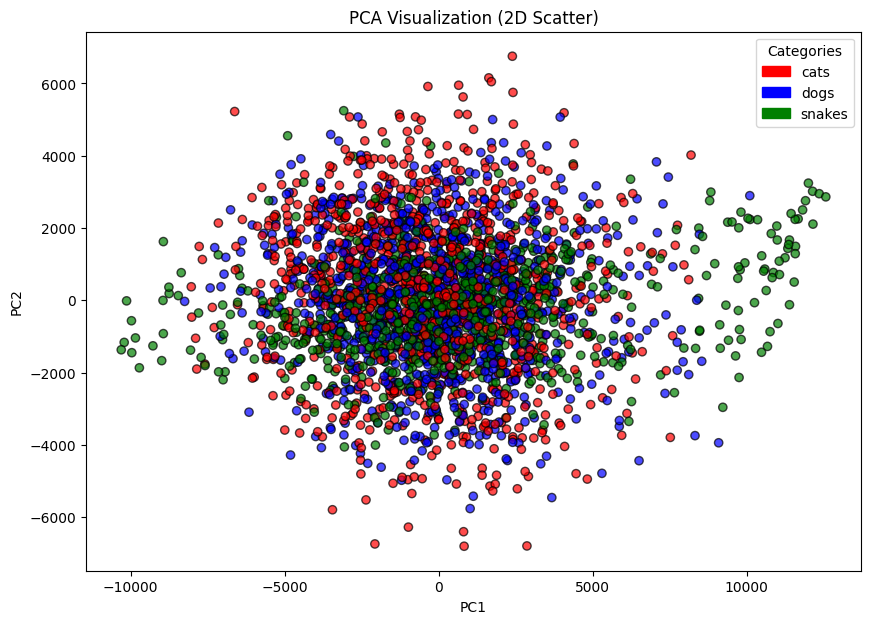

In [71]:
import matplotlib.patches as mpatches

# Step 3: Plot PCA Scatter
categories = {'cats': 'red', 'dogs': 'blue', 'snakes': 'green'}
colors = [categories[label] for label in labels]

plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=colors, alpha=0.7, edgecolors='k')
plt.title("PCA Visualization (2D Scatter)")
plt.xlabel("PC1")
plt.ylabel("PC2")

legend_patches = [mpatches.Patch(color=color, label=category) for category, color in categories.items()]
plt.legend(handles=legend_patches, title="Categories", loc="best")


The code applies three dimensionality reduction techniques—t-SNE, Locally Linear Embedding (LLE), and Multidimensional Scaling (MDS)—to reduce the high-dimensional image data to 2D for visualization. Each technique is used to transform the `images_matrix` (which contains flattened image data), and the results are plotted in scatter plots. The `scatter_plot` function visualizes these 2D projections with color-coded points based on image categories (e.g., cats, dogs, snakes). Additionally, a random subset of images is annotated onto the scatter plot, helping to visually relate the data points to their original images. This approach allows for an intuitive understanding of how the data clusters in a reduced-dimensional space, highlighting the differences between the techniques. However, there are small errors in the code where `tsne.fit_transform` was mistakenly applied to both LLE and MDS, which should be corrected for proper functioning.

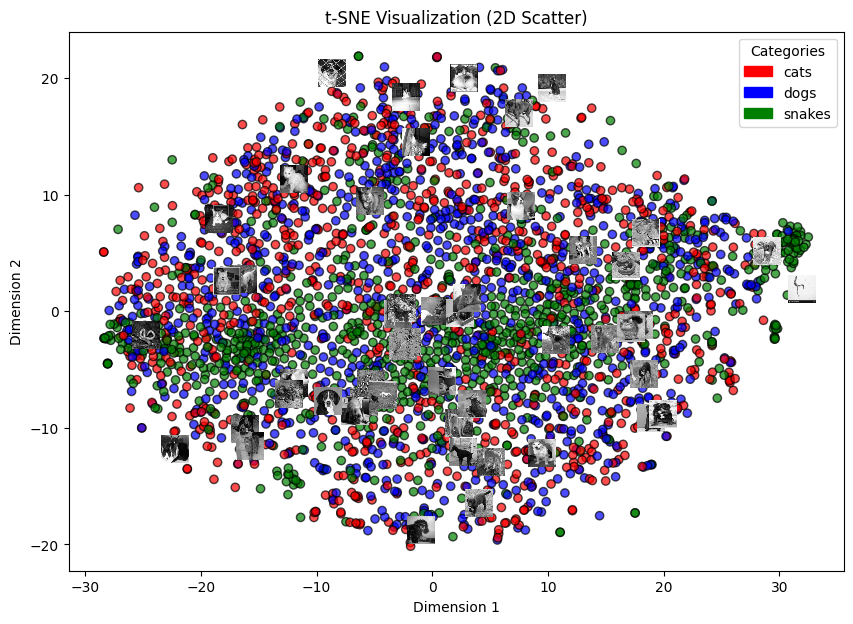

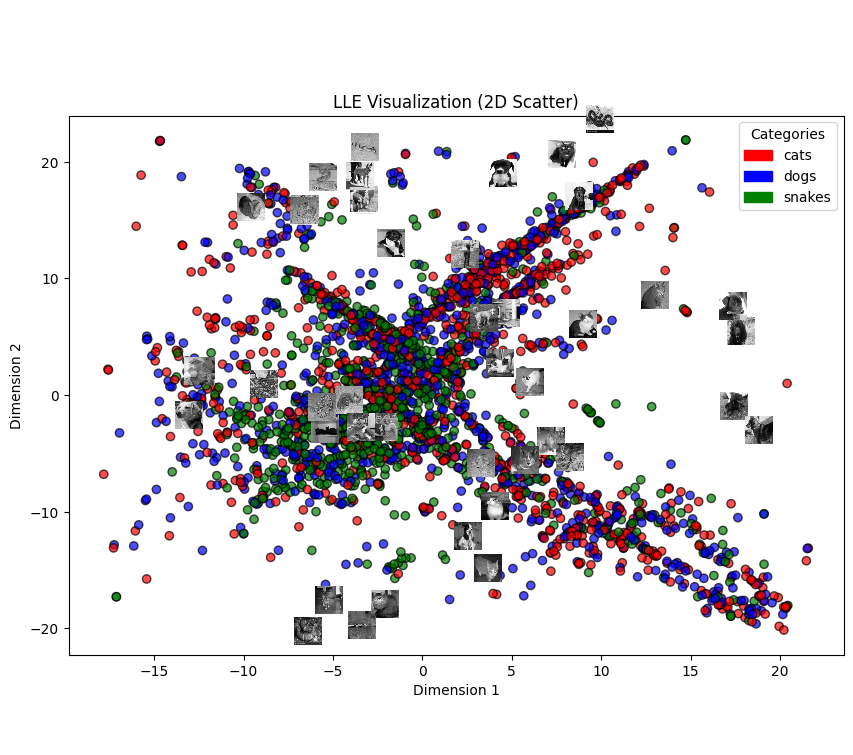

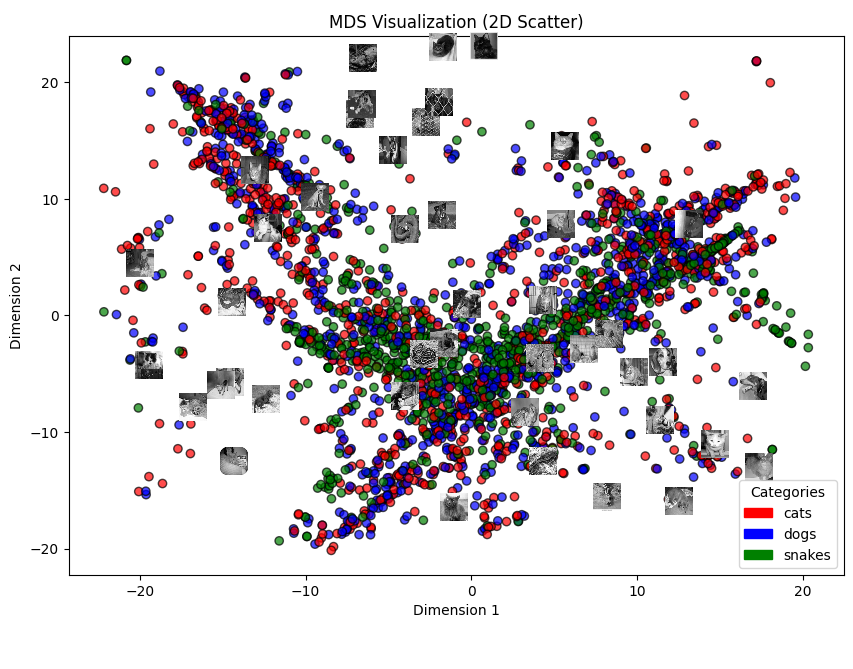

In [72]:


from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def scatter_plot(data, type):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(data[:, 0], tsne_data[:, 1], c=colors, alpha=0.7, edgecolors='k')
    plt.title(f"{type} Visualization (2D Scatter)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

    legend_patches = [mpatches.Patch(color=color, label=category) for category, color in categories.items()]
    plt.legend(handles=legend_patches, title="Categories", loc="best")

    subset_indices = np.random.choice(len(data), size=50, replace=False)  # Random subset
    for i in subset_indices:
        x, y = data[i]
        image_array = images_matrix[i].reshape(image_size)
        image = OffsetImage(image_array, zoom=0.2, cmap='gray')  # Adjust the zoom factor as needed
        ab = AnnotationBbox(image, (x, y), frameon=False)
        plt.gca().add_artist(ab)

    plt.show()

# Step 4: t-SNE
tsne = TSNE(n_components=2, init="random", learning_rate="auto",)
tsne_data = tsne.fit_transform(images_matrix)
scatter_plot(tsne_data, 't-SNE')

# Step 4: LLE
lle = LocallyLinearEmbedding(n_components=2)
lle_data = tsne.fit_transform(images_matrix)
scatter_plot(lle_data, 'LLE')

# Step 4: MDS
mds = MDS(n_components=2, normalized_stress=False)
mds_data = tsne.fit_transform(images_matrix)
scatter_plot(mds_data, 'MDS')


The code performs dimensionality reduction on image data using PCA to retain 90% of the variance, followed by clustering with Gaussian Mixture Models (GMM) and K-Means to identify the optimal number of clusters. It evaluates the clustering results using multiple metrics: the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) for GMM, silhouette score for cluster quality, and inertia for K-Means. These metrics are plotted for cluster sizes ranging from 2 to 10 to help determine the best clustering configuration, with lower BIC/AIC values, higher silhouette scores, and lower inertia values indicating better clustering performance.

Reduced dimensionality to: 263 components


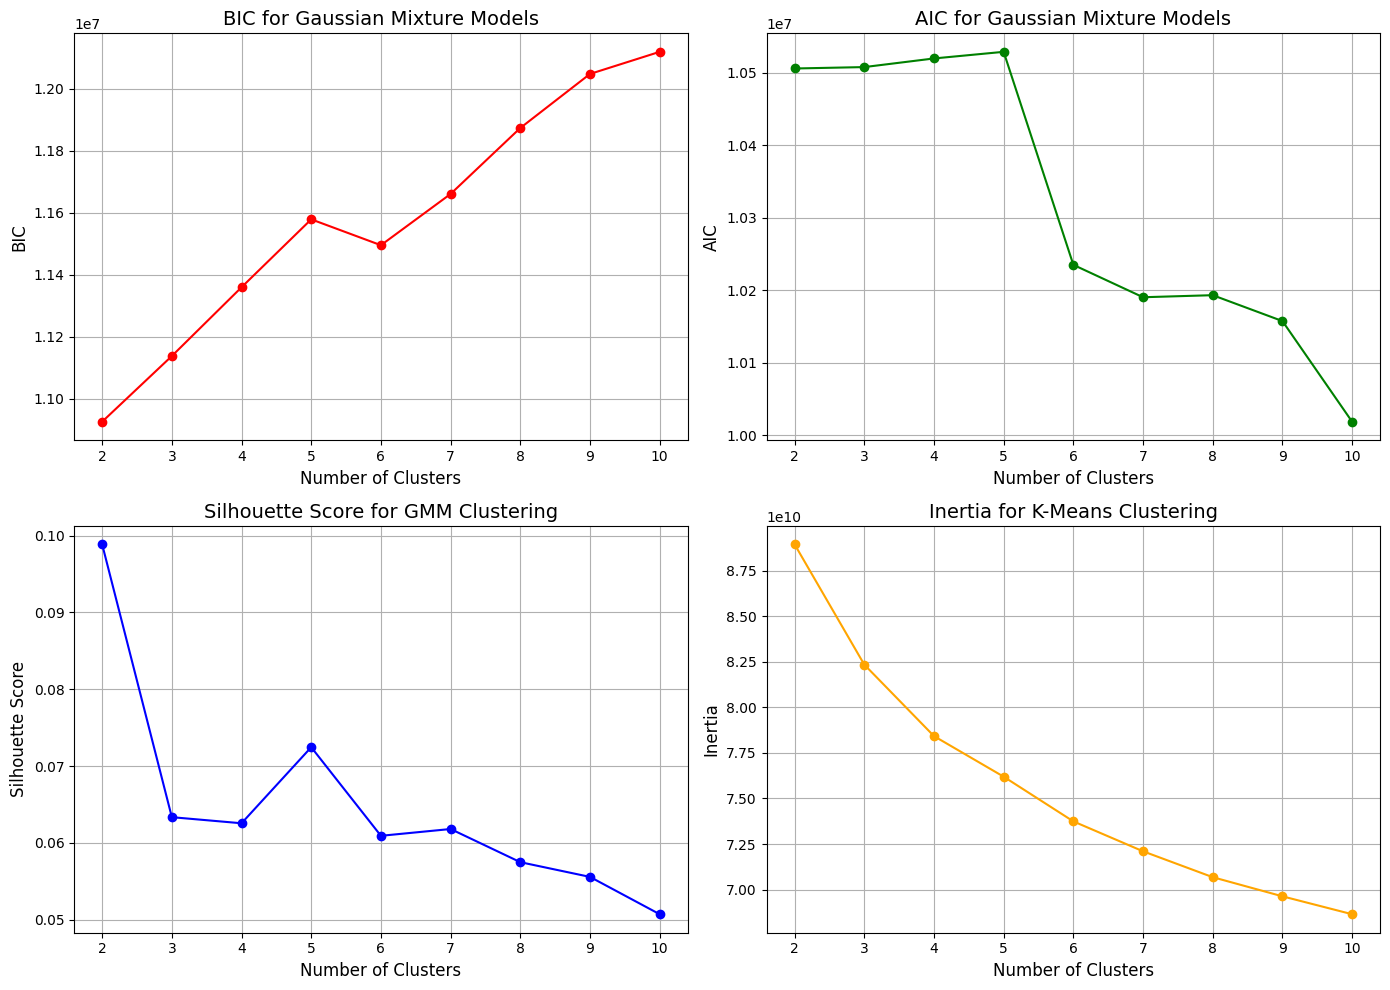

In [73]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Assuming your 360 images data is in a variable `images_matrix`
# Replace `images_matrix` with your actual image dataset

# Step 1: Dimensionality reduction with PCA to retain 90% variance
pca = PCA(n_components=0.90, random_state=42)  # Retain at least 90% variance
reduced_data = pca.fit_transform(images_matrix)
print(f"Reduced dimensionality to: {reduced_data.shape[1]} components")

# Step 2: Initialize ranges for clusters
num_clusters = range(2, 11)  # Testing cluster sizes from 2 to 10
bic_values = []
aic_values = []
silhouette_scores = []

# Step 3: Fit Gaussian Mixture Model (GMM) and compute AIC/BIC/Silhouette
for n_clusters in num_clusters:
    # Gaussian Mixture Model for AIC/BIC
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(reduced_data)
    bic_values.append(gmm.bic(reduced_data))  # Append BIC
    aic_values.append(gmm.aic(reduced_data))  # Append AIC

    # Silhouette Score (based on GMM cluster assignments)
    cluster_labels = gmm.predict(reduced_data)
    silhouette_scores.append(silhouette_score(reduced_data, cluster_labels))

inertia_values = []
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_data)
    inertia_values.append(kmeans.inertia_)

# Step 4: Plot the metrics to determine optimal clusters
plt.figure(figsize=(14, 10))

# BIC Plot
plt.subplot(2, 2, 1)
plt.plot(num_clusters, bic_values, marker='o', linestyle='-', color='r', label='BIC')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('BIC', fontsize=12)
plt.title('BIC for Gaussian Mixture Models', fontsize=14)
plt.grid(True)

# AIC Plot
plt.subplot(2, 2, 2)
plt.plot(num_clusters, aic_values, marker='o', linestyle='-', color='g', label='AIC')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('AIC', fontsize=12)
plt.title('AIC for Gaussian Mixture Models', fontsize=14)
plt.grid(True)

# Silhouette Score Plot
plt.subplot(2, 2, 3)
plt.plot(num_clusters, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for GMM Clustering', fontsize=14)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(num_clusters, inertia_values, marker='o', linestyle='-', color='orange', label='Inertia')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Inertia for K-Means Clustering', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

The code applies K-Means clustering to the PCA-reduced image data with 3 clusters, then evaluates the clustering performance using two metrics: accuracy and silhouette score. The accuracy is computed by comparing the clustering labels to the ground truth labels, though a mapping between predicted and true labels is required due to the nature of unsupervised learning. The silhouette score measures how well-defined the clusters are, with higher values indicating better separation. The results are visualized by plotting the 2D projections of the images, color-coded by their cluster assignments. The reported accuracy (0.34) and silhouette score (0.11) suggest that the clustering model has limited effectiveness in distinguishing the images into meaningful clusters.

Clustering Accuracy (K-Means, 3 Clusters): 0.34
Silhouette Score (K-Means, 3 Clusters): 0.11


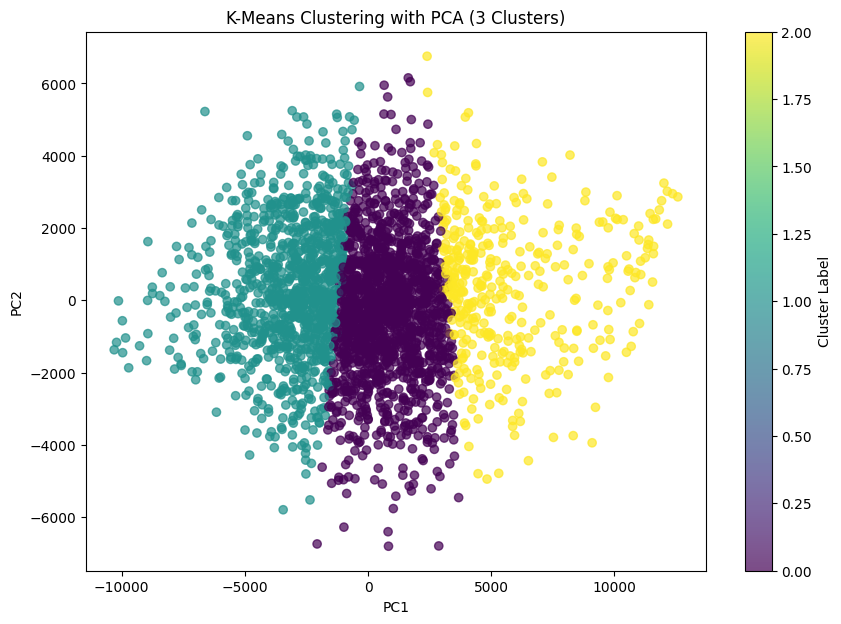

In [74]:

# Step 5: Cluster with 3 clusters (based on the question)
n_clusters = 3

# Apply K-Means for 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Optional: Evaluate clustering accuracy
# Assuming `true_labels` contains the ground truth labels ('I', 'M', 'S') for the images
# Replace `filenames` or `true_labels` with your actual label data
true_labels = labels  # Extract labels from filenames
label_encoder = LabelEncoder()
encoded_true_labels = label_encoder.fit_transform(true_labels)  # Convert to numerical labels

# Compute clustering accuracy (mapping required for unsupervised labels)
accuracy = accuracy_score(encoded_true_labels, kmeans_labels)
print(f"Clustering Accuracy (K-Means, 3 Clusters): {accuracy:.2f}")

# Optional: Silhouette Score for 3 clusters
silhouette_avg = silhouette_score(reduced_data, kmeans_labels)
print(f"Silhouette Score (K-Means, 3 Clusters): {silhouette_avg:.2f}")

# Step 6: Visualize clustering results in 2D space
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering with PCA (3 Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster Label")
plt.show()

The code performs Gaussian Mixture Model (GMM) clustering on image data after reducing its dimensionality using PCA, retaining 90% of the variance. It tests various cluster sizes (from 2 to 10) by calculating the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) for each cluster count, helping to identify the optimal number of clusters. It also compares the performance of K-Means clustering using inertia and evaluates the clustering results with silhouette scores. The optimal number of clusters is set to 3, and the clustering accuracy is computed by comparing the GMM cluster assignments with the true labels. Additionally, the code generates 20 new samples from the GMM, maps them back to the original space using PCA inverse transformation, and visualizes these samples to show how the GMM can create new, plausible data points based on the learned distribution.

Reduced dimensionality to: 263 components


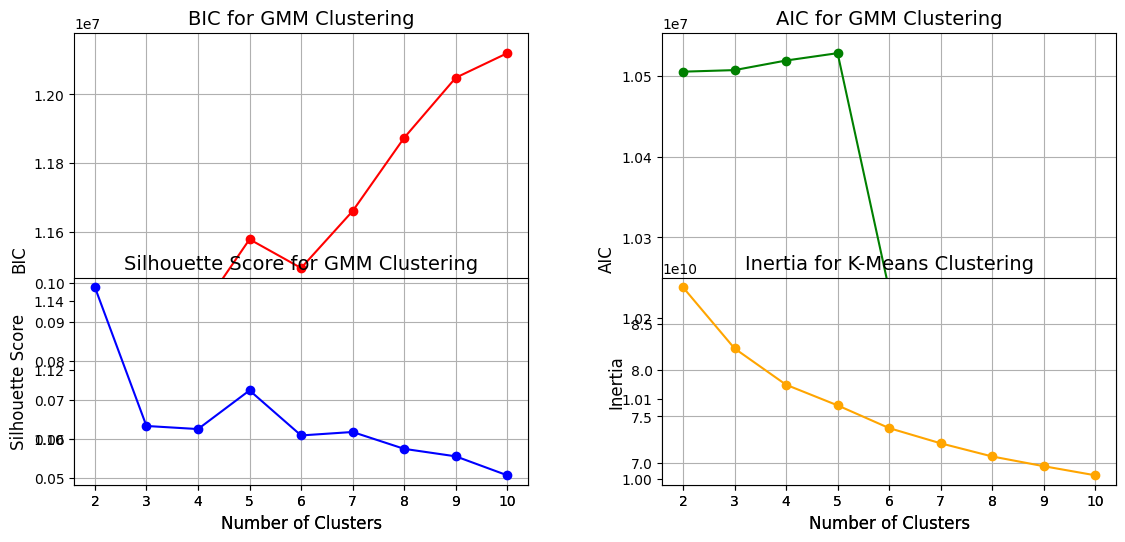

Clustering Accuracy (GMM, 3 Clusters): 0.34


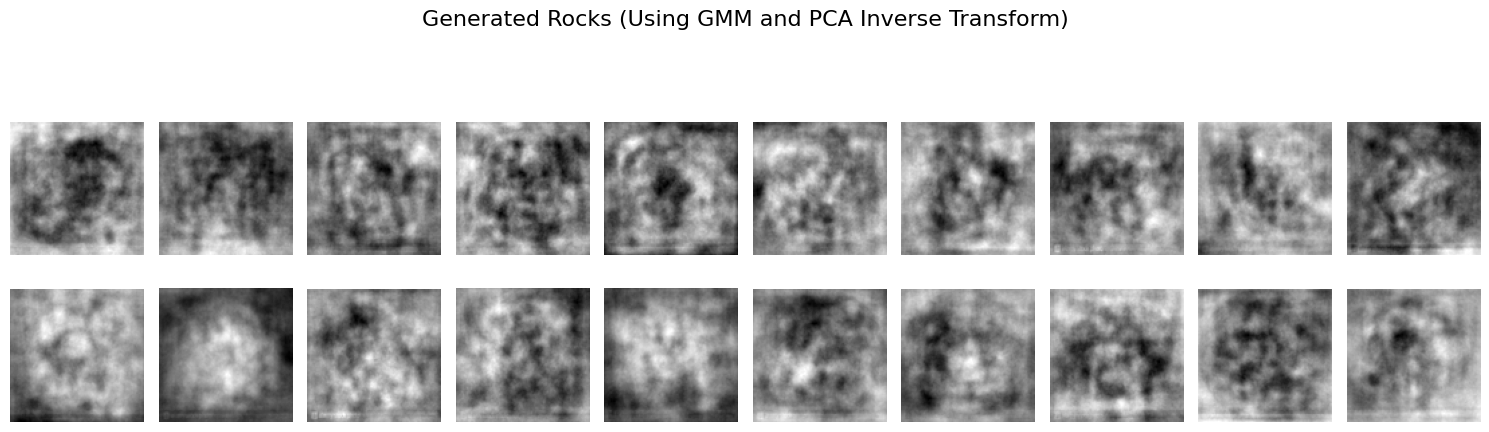

In [75]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Assuming `images_matrix` contains the 360 images data as a matrix

# Step 1: Dimensionality reduction with PCA to retain at least 90% variance
pca = PCA(n_components=0.90, random_state=42)
reduced_data = pca.fit_transform(images_matrix)
print(f"Reduced dimensionality to: {reduced_data.shape[1]} components")

# Step 2: Determine the optimal number of clusters using Gaussian Mixture Model (GMM)
num_clusters = range(2, 11)  # Testing cluster sizes from 2 to 10
bic_values = []
aic_values = []

for n_clusters in num_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(reduced_data)
    bic_values.append(gmm.bic(reduced_data))
    aic_values.append(gmm.aic(reduced_data))

# Step 4: Inertia (K-Means for comparison)
inertia_values = []
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(reduced_data)
    inertia_values.append(kmeans.inertia_)

# Plot AIC and BIC to find the optimal number of clusters
plt.figure(figsize=(12, 6))

# BIC Plot
plt.subplot(1, 2, 1)
plt.plot(num_clusters, bic_values, marker='o', linestyle='-', color='r')
plt.title("BIC for GMM Clustering", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("BIC", fontsize=12)
plt.grid(True)

# AIC Plot
plt.subplot(1, 2, 2)
plt.plot(num_clusters, aic_values, marker='o', linestyle='-', color='g')
plt.title("AIC for GMM Clustering", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("AIC", fontsize=12)
plt.grid(True)

# Silhouette Score Plot
plt.subplot(2, 2, 3)
plt.plot(num_clusters, silhouette_scores, marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score for GMM Clustering', fontsize=14)
plt.grid(True)

# Inertia Plot
plt.subplot(2, 2, 4)
plt.plot(num_clusters, inertia_values, marker='o', linestyle='-', color='orange', label='Inertia')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Inertia for K-Means Clustering', fontsize=14)
plt.grid(True)


plt.tight_layout()
plt.show()

# Step 3: Set the number of clusters to 3 (as per the question)
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(reduced_data)

# Step 4: Clustering Accuracy
# Assuming `true_labels` contains the ground truth labels ('I', 'M', 'S') for the images
# Replace `filenames` or `true_labels` with your actual label data
true_labels = labels  # Extract labels from filenames
label_encoder = LabelEncoder()
encoded_true_labels = label_encoder.fit_transform(true_labels)

# Compute clustering accuracy
accuracy = accuracy_score(encoded_true_labels, gmm_labels)
print(f"Clustering Accuracy (GMM, 3 Clusters): {accuracy:.2f}")

# Step 5: Generate 20 new samples using the GMM and inverse transform to original space
new_samples, _ = gmm.sample(20)  # Generate 20 new samples in the reduced space
new_samples_original_space = pca.inverse_transform(new_samples)  # Map back to original space

# Step 6: Visualize the generated samples
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(new_samples_original_space[i].reshape(image_size), cmap='gray')
    plt.axis('off')

plt.suptitle("Generated Rocks (Using GMM and PCA Inverse Transform)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The code snippet prepares the image data for training and testing in a machine learning model. It first converts the list of images into a NumPy array (`images_np`). The labels, which represent categories such as 'cats', 'dogs', and 'snakes', are encoded into numerical values (0, 1, and 2, respectively) using a list comprehension. The images and corresponding labels are then split into training and testing datasets, with 2700 samples allocated for training and the remaining for testing. The training and testing sets are reshaped to match the input shape expected by a deep learning model (100x100 pixels with a single channel for grayscale images). This prepares the data for further processing, such as feeding it into a convolutional neural network (CNN) or other machine learning algorithms.

In [113]:
images_np = np.array(images)
labels_encoded = [0 if label == 'cats' else 1 if label == 'dogs' else 2 for label in labels]
labels_np = np.array(labels_encoded)
X_train, X_test = images_np[:2700], images_np[2700:]
y_train, y_test = labels_np[:2700], labels_np[2700:]

In [114]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train = X_train.reshape(-1, 100, 100, 1)
X_test = X_test.reshape(-1, 100, 100, 1)

The code builds and trains a Convolutional Neural Network (CNN) using Keras for image classification. The model starts with four convolutional blocks, each consisting of convolutional layers (with ReLU activation), followed by max-pooling layers to reduce the spatial dimensions. The network depth increases with each block (32, 64, 128, and 256 filters), and additional convolutional layers are added to improve feature extraction. After the convolutional layers, the data is flattened and passed through two dense layers, with Dropout regularization to prevent overfitting. The final output layer uses softmax activation for multi-class classification with 3 classes. To enhance model generalization, data augmentation techniques such as rotation, shifting, and zooming are applied to the training data using `ImageDataGenerator`. The model is compiled with the Adam optimizer (with a low learning rate of 0.0001) and sparse categorical crossentropy loss, and it is trained for 17 epochs. The training time is recorded for performance analysis.

In [117]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Build a more complex model
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  # Added another Conv2D layer
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Added another Conv2D layer
model.add(layers.MaxPooling2D((2, 2)))

# Fourth Convolutional Block (Optional)
model.add(layers.Conv2D(256, (3, 3), activation='relu'))  # Increased depth with more filters
model.add(layers.MaxPooling2D((2, 2)))  # Additional pooling layer for downsampling

# Flattening and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))  # Increased dense layer size
model.add(layers.Dropout(0.5))  # Regularization Dropout layer

model.add(layers.Dense(128, activation='relu'))  # Retained the original Dense layer
model.add(layers.Dropout(0.3))  # Added a second Dropout layer

# Output Layers
model.add(layers.Dense(8, activation='relu'))  # Latent layer before output
model.add(layers.Dense(3, activation='softmax'))  # Output layer for 3 classes


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to your training data
# datagen.fit(X_train)
# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Record start time
import time
start_time = time.time()

# Train the model with data augmentation
history = model.fit(X_train, y_train,
                    epochs=17,
                    validation_data=(X_test, y_test))

# Record end time
end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Epoch 1/17
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 160ms/step - accuracy: 0.3125 - loss: 1.9661 - val_accuracy: 0.3467 - val_loss: 1.0984
Epoch 2/17
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.3515 - loss: 1.0944 - val_accuracy: 0.4133 - val_loss: 1.0527
Epoch 3/17
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.4504 - loss: 1.0284 - val_accuracy: 0.5133 - val_loss: 0.9310
Epoch 4/17
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.4931 - loss: 0.9672 - val_accuracy: 0.5533 - val_loss: 0.8682
Epoch 5/17
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.5577 - loss: 0.8828 - val_accuracy: 0.5700 - val_loss: 0.8438
Epoch 6/17
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.5913 - loss: 0.8514 - val_accuracy: 0.5733 - val_loss: 0.8038
Epoch 7/17
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.5969 - loss: 0.8071 - val_accuracy: 0.5867 - val_loss: 0.8880
Epoch 8/17
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.5871 - loss: 0.8418 - val_accura

The code visualizes the training process of the CNN by plotting the loss and accuracy for both the training and validation datasets across all epochs. The training time is printed at the beginning. The first plot shows the training and validation loss, allowing for an assessment of how the model’s error decreases over time for both training and validation sets. The second plot visualizes the training and validation accuracy, showing how well the model performs on each dataset during training. These plots help in identifying overfitting (if the validation accuracy diverges from training accuracy) or underfitting (if both accuracies remain low). The use of `plt.tight_layout()` ensures that the plots are displayed clearly without overlap.

Training Time: 233.11 seconds


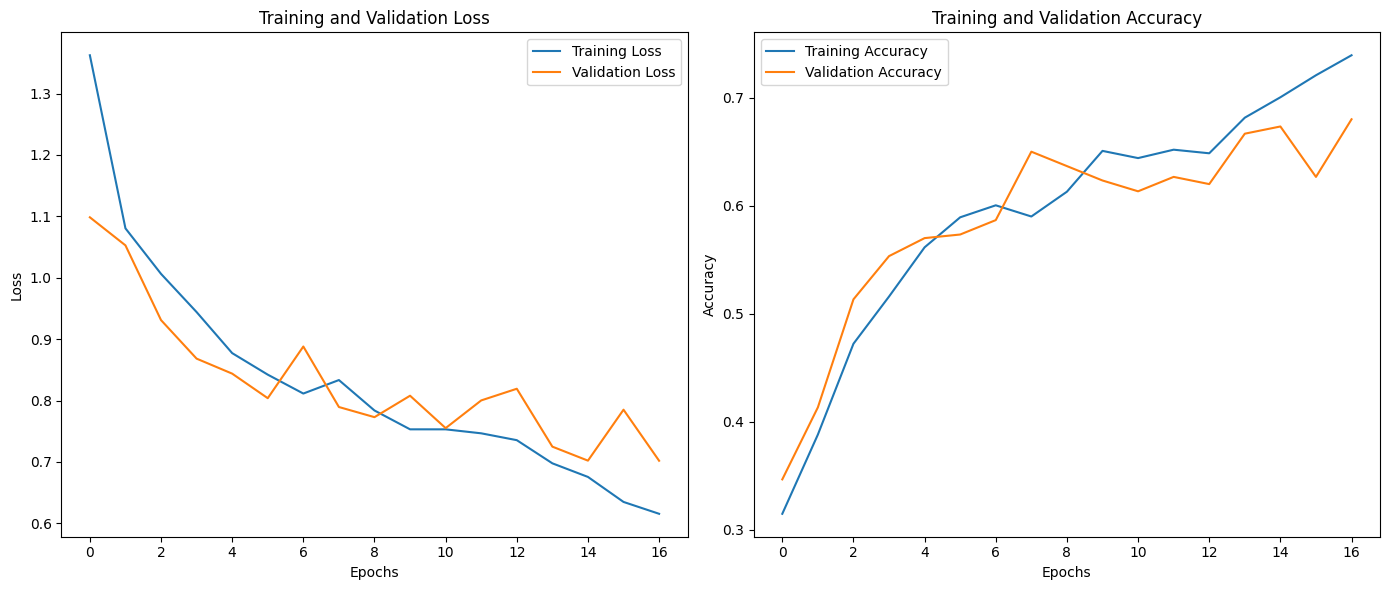

In [118]:

print(f"Training Time: {training_time:.2f} seconds")

# Plot training and validation loss/accuracy
plt.figure(figsize=(14, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


The code calculates and prints the total number of parameters and the number of bias parameters in the CNN model. The total parameters are calculated using `model.count_params()`, which returns the sum of all trainable parameters in the model, including weights and biases. The bias parameters are separately counted by iterating over the model's trainable weights and summing the number of elements in the weights with a shape length of 1 (which corresponds to bias terms). This distinction helps understand the complexity of the model in terms of learnable weights and the role of biases in each layer.

In [119]:
# Get the total number of parameters and bias parameters
total_params = model.count_params()
bias_params = np.sum([np.prod(p.shape) for p in model.trainable_weights if len(p.shape) == 1])

print(f"Total Number of Parameters: {total_params}")
print(f"Number of Bias Parameters: {bias_params}")


Total Number of Parameters: 1168707
Number of Bias Parameters: 1035
